In [35]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''
import tensorflow as tf
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm_notebook
import pickle

from scipy import stats

%matplotlib inline

In [23]:
mask_path = "/mnt/storage_4tb/ymi/geo_data/angle_net_data/dist_maps_train/rio_1-134/edges/2_2974_4461_0_1487.png"
size = (224,224)

mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
mask = cv2.resize(mask, size, cv2.INTER_NEAREST)

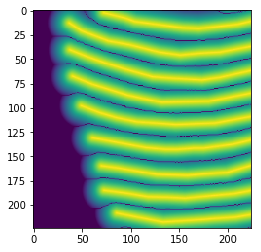

In [24]:
plt.imshow(mask)

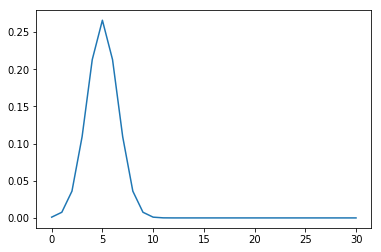

In [101]:
x = np.arange(31)
mu = 5
sigma = 1.5
gaussian = np.exp(-np.square(x - mu)/ ( 2 * np.square(sigma))) / (sigma * np.sqrt(2*np.pi))
plt.plot(gaussian)

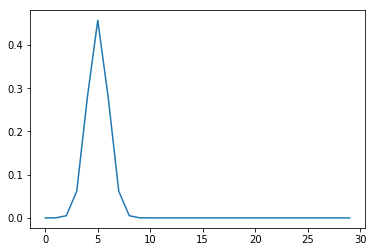

In [80]:
mu = 5
sigma = 1.5
plt.plot(np.exp(-np.square(x - mu)/2) / (np.sqrt(2 * np.pi - sigma)))

In [25]:
d

array([ 0.        ,  1.41421356,  2.82842712,  4.24264069,  5.65685425,
        7.07106781,  8.48528137,  9.89949494, 11.3137085 , 12.72792206,
       14.14213562, 15.55634919, 16.97056275, 18.38477631, 19.79898987,
       21.21320344, 22.627417  , 24.04163056, 25.45584412, 26.87005769,
       28.28427125, 29.69848481, 31.11269837, 32.52691193, 33.9411255 ,
       35.35533906, 36.76955262, 38.18376618, 39.59797975, 41.01219331,
       42.42640687])

In [ ]:
def image_to_tensor(mask, max_norm = 0.1329807601338109, max_angle=180):
    stats.norm(30, 3).pdf(np.arange(0, 180))

In [ ]:
np.zeros((size[0] * size[1], 30))[0]

In [ ]:
result = np.zeros((size[0], size[1], 30))

In [69]:
stats.norm(5, 1.5).pdf(np.arange(0, 30))

array([1.02818600e-03, 7.59732402e-03, 3.59939777e-02, 1.09340050e-01,
       2.12965337e-01, 2.65961520e-01, 2.12965337e-01, 1.09340050e-01,
       3.59939777e-02, 7.59732402e-03, 1.02818600e-03, 8.92201505e-05,
       4.96403058e-06, 1.77086794e-07, 4.05058857e-09, 5.94060012e-11,
       5.58628049e-13, 3.36818072e-15, 1.30211177e-17, 3.22761238e-20,
       5.12973242e-23, 5.22743066e-26, 3.41556127e-29, 1.43092249e-32,
       3.84370784e-36, 6.62010473e-40, 7.31071040e-44, 5.17647989e-48,
       2.35011823e-52, 6.84108715e-57])

In [ ]:
dist_map = mask.astype(np.float32) * 30 / 255
max_norm = 0.1329807601338109
res_arr = []
for i in tqdm_notebook(dist_map.flatten()):
    if i != 0:
        res_arr.append(stats.norm(i, 1.5).pdf(np.arange(0, 30)) / max_norm)
    else:
        res_arr.append(np.zeros(30))

In [65]:
dist_map = mask.astype(np.float32) * 30 / 255
max_norm = 0.1329807601338109 * 2
res_arr = np.zeros((size[0] * size[1], 30))
for num, i in tqdm_notebook(enumerate(dist_map.flatten())):
    if i != 0:
        res_arr[num] = stats.norm(i, 1.5).pdf(np.arange(0, 30)) / max_norm
    else:
        continue

In [22]:
dist_map.shape

NameError: name 'dist_map' is not defined

In [27]:
from numba import jit
import numpy as np

#x = np.arange(100).reshape(10, 10)

@jit(nopython=True)
def go_fast(dist_map, size, cat_number):
    res_arr = np.zeros((size[0] * size[1], cat_number))
    flatten_map = dist_map.flatten()
    for i in np.arange(flatten_map.shape[0]):
        arr_x = np.arange(0, cat_number)
        mu = flatten_map[i]
        sigma = 1.5
        res = np.exp(-np.square(arr_x - mu)/ ( 2 * np.square(sigma))) / (sigma * np.sqrt(2*np.pi))
        res = res/res.max()
        res_arr[i] = res
    return res_arr

dist_map = mask.astype(np.float32) * 30 / 255
result = go_fast(dist_map, size, 31)

In [52]:
%time
dist_map = mask.astype(np.float32) * 30 / 255
result = go_fast(dist_map, size, 31)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


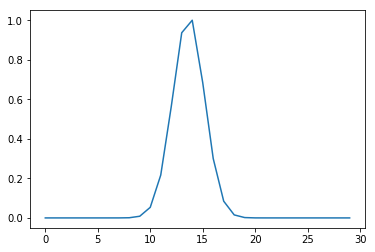

In [109]:
plt.plot(result[112])

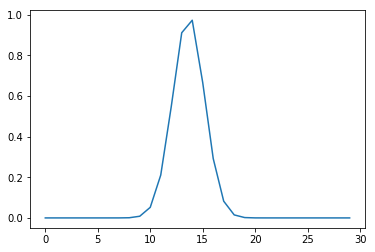

In [110]:
plt.plot(res_arr[112])

In [67]:
result[112].max()

0.5424876275673081

In [66]:
result.max()

0.5773502691896258

In [ ]:
from numba import jit
import numpy as np

x = np.arange(100).reshape(10, 10)

@jit(nopython=True) # Set "nopython" mode for best performance, equivalent to @njit
def go_fast(a): # Function is compiled to machine code when called the first time
    trace = 0
    for i in range(a.shape[0]):   # Numba likes loops
        trace += np.tanh(a[i, i]) # Numba likes NumPy functions
    return a + trace              # Numba likes NumPy broadcasting

print(go_fast(x))

In [ ]:
dist_map.shape

In [ ]:
dist_map.flatten()

In [ ]:
res

In [ ]:
plt.plot(res_arr[112])

In [ ]:
dist_map = 30 - (mask.astype(np.float32) * 30 / 255).astype(np.uint8)

In [ ]:
plt.imshow(dist_map)

In [53]:


def prepare_data(root_folder, size, save_folder, max_disst=31):
    mask_names = os.listdir(root_folder)
    os.makedirs(save_folder, exist_ok=True)
    #max_norm = 0.1329807601338109 * 2
    for mask_name in tqdm_notebook(mask_names):
        mask_path = os.path.join(root_folder, mask_name)
        save_path = os.path.join(save_folder, mask_name.replace(".png", ".npy"))
        if os.path.exists(save_path):
            continue
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, size, cv2.INTER_NEAREST)
        dist_mask = mask.astype(np.float32) * (max_disst - 1) / 255
        #res_arr = []
        res_arr = go_fast(dist_mask, size, cat_number=max_disst)
        result = np.array(res_arr).reshape((size[0], size[1], max_disst))
        
        np.save(save_path, result)
#         pickle_write(save_path, result)

In [5]:
root_folder = "/mnt/storage_4tb/ymi/geo_data/angle_net_data/dist_maps_train/1-55/masks"
save_folder = "/mnt/storage_4tb/ymi/geo_data/angle_net_data/dist_maps_train/1-55/np_arrays_dist"
size = (256,256)

prepare_data(root_folder, size, save_folder)

In [38]:
def pickle_write(save_path, data):
    with open(save_path, "wb") as f:
        pickle.dump(data, f)

In [51]:
root_folder = "/mnt/storage_4tb/ymi/geo_data/angle_net_data/dist_maps_train"
#save_folder = "/mnt/storage_4tb/ymi/geo_data/angle_net_data/dist_maps_train/1-55/np_arrays_dist"

for folder in os.listdir(root_folder):
    if not os.path.isdir(os.path.join(root_folder, folder)):
        continue
    mask_folder = os.path.join(root_folder, folder, "masks")
    save_folder = os.path.join(root_folder, folder, "np_arrays_dist_384")
    size = (384,384)

    prepare_data(mask_folder, size, save_folder, max_disst=61)

In [40]:
mask_folder

'/mnt/storage_4tb/ymi/geo_data/angle_net_data/dist_maps_train/1-61/masks'

In [ ]:
result = np.array(res_arr).reshape((size[0], size[1], 180))

In [ ]:
result.argmax()

In [ ]:
plt.plot(result[50, 50, :])

In [ ]:
plt.plot(result[50, 60, :])

In [ ]:
result.max()

In [ ]:
tf.keras.losses.binary_crossentropy

In [ ]:
arr = np.load("/mnt/storage_4tb/ymi/geo_data/40m_for_ori/citrusuco/angle_training_180/504/np_arrays/1_1969_3938_0_1969.npy")

In [ ]:
arr_2 = np.expand_dims(arr, axis=0)

In [31]:
def kld_loss(labels, predictions):
    #mask = tf.cast(tf.not_equal(tf.reduce_sum(arr_2, axis=-1), 0), tf.float64)
    kl_loss = tf.losses.kullback_leibler_divergence(labels, predictions)
    #kl_loss = kl_loss * mask
    kl_loss = tf.reduce_sum(kl_loss, axis=0)
    return tf.reduce_mean(kl_loss)

In [19]:
from tensorflow.keras.losses import binary_crossentropy, mean_squared_error, mean_absolute_error

def angle_rmse(pred, labels):
    pred = tf.cast(tf.argmax(pred, axis=-1), tf.float32)
    labels = tf.cast(tf.argmax(labels, axis=-1), tf.float32)
    mask = tf.cast(tf.not_equal(labels, 0), tf.float32)

    labels = labels * mask
    pred = pred * mask
    score = tf.math.sqrt(mean_squared_error(y_pred=pred, y_true=labels))
    score = tf.reduce_mean(score, axis=1)
    return score

In [28]:
tf.not_equal(tf.reduce_sum(result, axis=-1), 0)

<tf.Tensor: id=4, shape=(50176,), dtype=bool, numpy=array([ True,  True,  True, ...,  True,  True,  True])>

In [34]:
tf.losses.kullback_leibler_divergence(result[0], result[112])

<tf.Tensor: id=72, shape=(), dtype=float64, numpy=37.41942039660652>

In [32]:
kld_loss(result, result)

<tf.Tensor: id=40, shape=(), dtype=float64, numpy=0.0>

In [ ]:
angle_rmse(arr_2, arr_2)

In [ ]:
tf.cast(tf.argmax(arr_2, axis=-1), tf.float32)

In [ ]:
after_softmax = tf.nn.softmax(result, axis=-1)

In [ ]:
plt.plot(after_softmax[50, 60, :])

In [ ]:
kl_loss

In [ ]:
tf.losses.binary_crossentropy()

In [ ]:
stats.norm(mask, 3).pdf(np.arange(0, 180))

In [ ]:
from scipy import stats
batch_x = list(map(lambda x: 
                    stats.norm(x, 3).pdf(np.arange(0, 180)), 
                    mask.flatten())
              )

In [ ]:
plt.plot(stats.norm(30, 3).pdf(np.arange(0, 180)) / 0.13)

In [ ]:
stats.norm(30, 3).pdf(np.arange(0, 180))

In [ ]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

In [ ]:
# define constants
mu = 1 
sigma = 0.5
x1 = 900
x2 = 1100

In [ ]:
# calculate the z-transform
z1 = ( x1 - mu ) / sigma
z2 = ( x2 - mu ) / sigma

In [ ]:
x = np.arange(z1, z2, 0.001) # range of x in spec
x_all = np.arange(-10, 10, 0.001) # entire range of x, both in and out of spec
# mean = 0, stddev = 1, since Z-transform was calculated
y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)

In [ ]:
plt.plot(x_all, y2)

In [ ]:
# build the plot
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x_all,y2)

ax.fill_between(x,y,0, alpha=0.3, color='b')
ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlim([-4,4])
ax.set_xlabel('# of Standard Deviations Outside the Mean')
ax.set_yticklabels([])
ax.set_title('Normal Gaussian Curve')

plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

In [ ]:
plt.plot(s)